# First comparison of costs

In [1]:
cd("../../src/")

In [2]:
include("nui.jl")

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.



In [3]:
include("optimize-waterallocation.jl")

Loading from saved region network...


  likely near /home/laureline/.julia/v0.4/Graphs/src/common.jl:3
  likely near /home/laureline/.julia/v0.4/Graphs/src/dot.jl:80


Loading from saved water network...
Optimize a model with 68222 rows, 112298 columns and 3739150 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [2e+01, 1e+06]
  Bounds range    [0e+00, 0e+00]
  RHS range       [7e-02, 1e+14]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 17679 rows and 20080 columns
Presolve time: 1.52s
Presolved: 50543 rows, 92597 columns, 2313501 nonzeros

Ordering time: 0.26s

Barrier statistics:
 Free vars  : 379
 AA' NZ     : 1.498e+06
 Factor NZ  : 2.399e+06 (roughly 80 MBytes of memory)
 Factor Ops : 2.150e+08 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.99304040e+16 -1.18957702e+18  1.29e+13 6.11e+02  8.81e+12     3s
   1   1.99308569e+16 -1.58245838e+19  1.29e+13 7.75e+02  8.83e+12     3s
   2   1.99396923e+16 -9.52307201e+21  1.29e+13

49744

In [4]:
include("simulate.jl");
# getting volumes and costs at the county level from the simulation
sw = getdata(:Allocation, :swsupply);
swc = getdata(:WaterCost, :swcost);
gw = getdata(:Allocation, :gwsupply);
gwc = getdata(:WaterCost, :gwcost);
supw = getdata(:Allocation, :supersourcesupply);
supwc = getdata(:WaterCost, :supersourcecost);

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...
Running model...
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.0224860

-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/home/laureline/anaconda2/lib/R/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: foreign


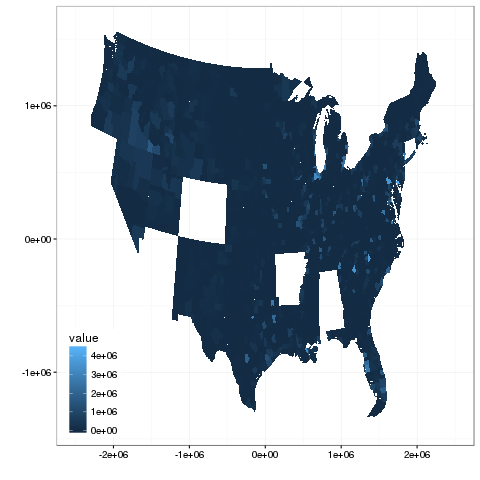

RCall.RObject{RCall.VecSxp}


In [5]:
# mapping total volumes per source type
mapdata(:Allocation, :swsupply, "sum")

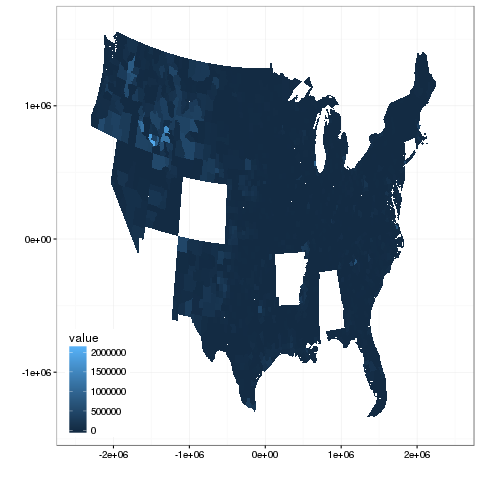

RCall.RObject{RCall.VecSxp}


In [6]:
mapdata(:Allocation, :gwsupply, "sum")

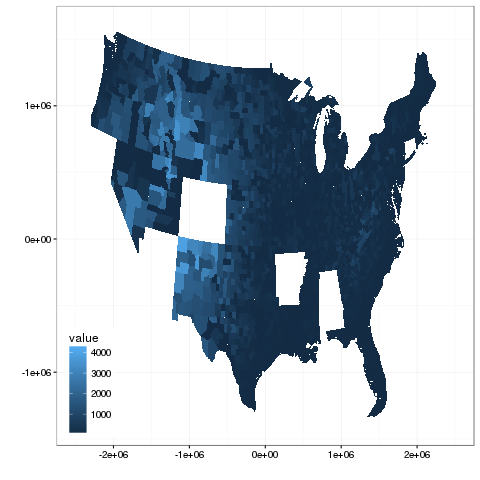

RCall.RObject{RCall.VecSxp}


In [7]:
# cost of water per 1000m3
mapdata(sum((supwc+gwc+swc)./(supw+gw+sw),2))

In [8]:
# comparison with usgs estimates - loading the data
recorded = readtable(datapath("extraction/USGS-2010.csv"));
swusgs = recorded[:, :TO_SW] * 1383. / 12 *config["timestep"] * numsteps;
gwusgs = recorded[:, :TO_GW] * 1383. / 12 *config["timestep"] * numsteps;
ugwc=getdata(:WaterCost, :unitgwextractioncost)[:,2]+getdata(:WaterCost, :unitgwtreatmentcost)[:,2] + getdata(:WaterCost, :unitdistributioncost)[:,2];
gwusgsc = gwusgs .* ugwc;

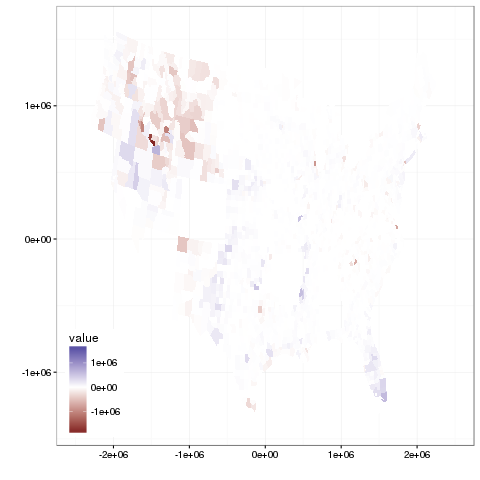

RCall.RObject{RCall.VecSxp}


In [9]:
# mapping difference in volume per source type
mapdata(sum(sw,2).-swusgs, nothing, nothing, true)

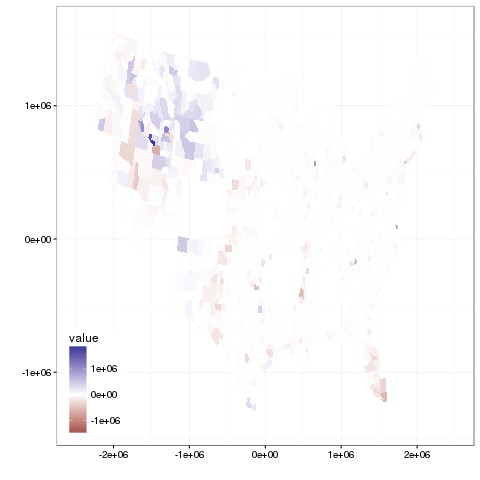

RCall.RObject{RCall.VecSxp}


In [10]:
mapdata(sum(gw,2).-gwusgs, nothing, nothing, true)